In [ ]:
import nltk
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
senti =pd.read_csv('/content/drive/MyDrive/422 project/1429_1.csv')
senti.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [ ]:
senti.shape

(34660, 21)

In [ ]:
senti.isnull().sum()

id                          0
name                     6760
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               39
reviews.dateAdded       10621
reviews.dateSeen            0
reviews.didPurchase     34659
reviews.doRecommend       594
reviews.id              34659
reviews.numHelpful        529
reviews.rating             33
reviews.sourceURLs          0
reviews.text                1
reviews.title               5
reviews.userCity        34660
reviews.userProvince    34660
reviews.username            2
dtype: int64

In [ ]:
senti=senti.drop(['keys','manufacturer','brand','reviews.id', 'reviews.date', 'reviews.dateAdded','reviews.dateSeen','reviews.userProvince','reviews.didPurchase','reviews.userCity','reviews.sourceURLs'], axis = 1)

In [ ]:
senti.head()

,id,name,asins,categories,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",True,0.0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",True,0.0,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",True,0.0,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",True,0.0,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",True,0.0,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


In [ ]:
senti.describe()

,reviews.numHelpful,reviews.rating
count,34131.000000,34627.000000
mean,0.630248,4.584573
std,13.215775,0.735653
min,0.000000,1.000000
25%,0.000000,4.000000
50%,0.000000,5.000000
75%,0.000000,5.000000
max,814.000000,5.000000


In [ ]:
senti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   34660 non-null  object 
 1   name                 27900 non-null  object 
 2   asins                34658 non-null  object 
 3   categories           34660 non-null  object 
 4   reviews.doRecommend  34066 non-null  object 
 5   reviews.numHelpful   34131 non-null  float64
 6   reviews.rating       34627 non-null  float64
 7   reviews.text         34659 non-null  object 
 8   reviews.title        34655 non-null  object 
 9   reviews.username     34658 non-null  object 
dtypes: float64(2), object(8)
memory usage: 2.6+ MB


In [ ]:
senti.isnull().sum()

id                        0
name                   6760
asins                     2
categories                0
reviews.doRecommend     594
reviews.numHelpful      529
reviews.rating           33
reviews.text              1
reviews.title             5
reviews.username          2
dtype: int64

In [ ]:
senti_data=senti[['reviews.rating','reviews.text','reviews.title']]
print(senti_data)
senti_data.shape

       reviews.rating                                       reviews.text  \
0                 5.0  This product so far has not disappointed. My c...   
1                 5.0  great for beginner or experienced person. Boug...   
2                 5.0  Inexpensive tablet for him to use and learn on...   
3                 4.0  I've had my Fire HD 8 two weeks now and I love...   
4                 5.0  I bought this for my grand daughter when she c...   
...               ...                                                ...   
34655             3.0  This is not appreciably faster than any other ...   
34656             1.0  Amazon should include this charger with the Ki...   
34657             1.0  Love my Kindle Fire but I am really disappoint...   
34658             1.0  I was surprised to find it did not come with a...   
34659             1.0  to spite the fact that i have nothing but good...   

                                           reviews.title  
0                           

(34660, 3)

In [ ]:
senti_data.isnull().sum()


reviews.rating    33
reviews.text       1
reviews.title      5
dtype: int64

In [ ]:
senti_data = senti_data.dropna(axis = 0, subset = ['reviews.rating','reviews.text','reviews.title'])
senti_data.isnull().sum()

reviews.rating    0
reviews.text      0
reviews.title     0
dtype: int64

Review Rating Statistics
 2.0      402
1.0      410
3.0     1499
4.0     8541
5.0    23769
Name: reviews.rating, dtype: int64


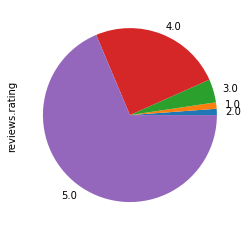

In [ ]:
reviewStats=senti_data["reviews.rating"].value_counts().sort_values()
print("Review Rating Statistics\n",reviewStats)
senti_data["reviews.rating"].value_counts().sort_values().plot.pie()

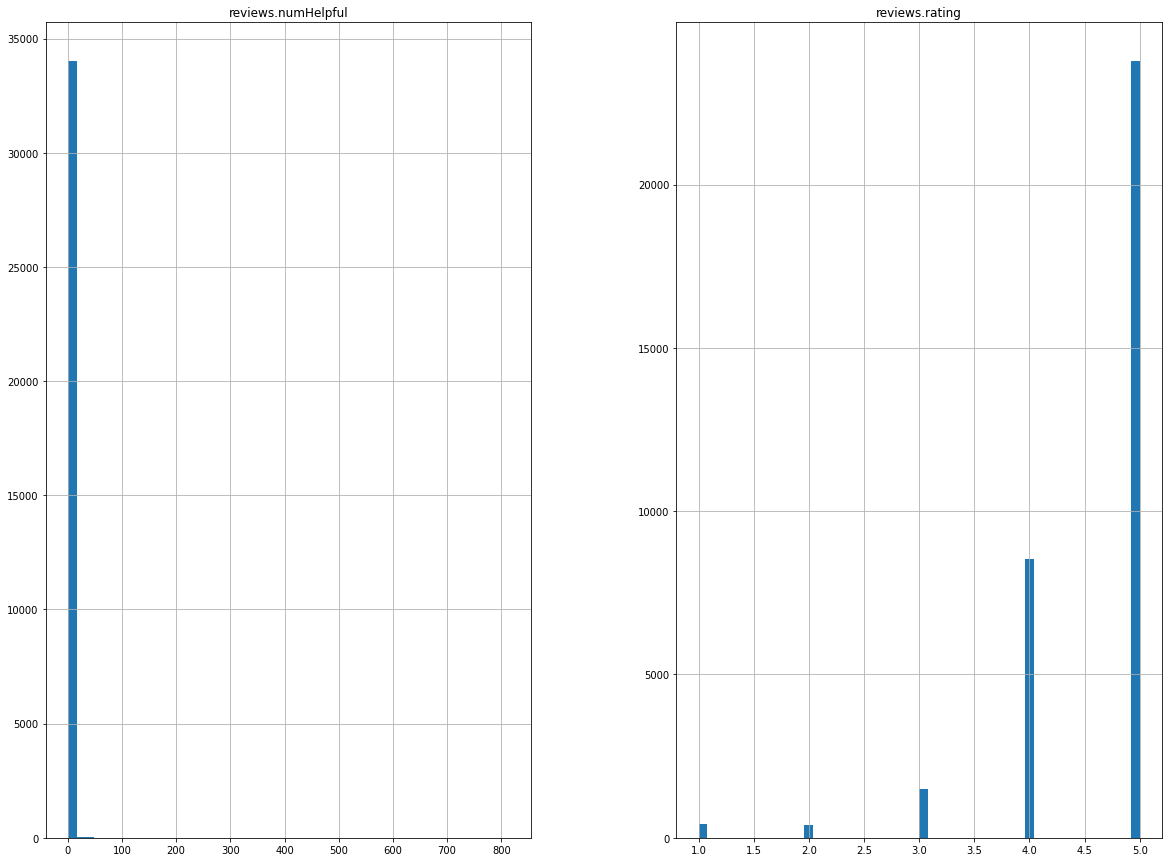

In [ ]:
senti.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
senti.groupby("asins")["name"].unique()

asins
B002Y27P3M               [Kindle Keyboard,,,\r\nKindle Keyboard,,,, All...
B002Y27P6Y                                                           [nan]
B005PB2T0S               [Amazon Kindle Lighted Leather Cover,,,\r\nAma...
B005PB2T2Q               [Fire Kids Edition Tablet, 7 Display, Wi-Fi, 1...
B006GWO5NE                                                           [nan]
B006GWO5WK                                                           [nan]
B0083Q04TA               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00BFJAHF8                                                           [nan]
B00DU15MU4               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00IOY8XWQ               [Kindle Voyage E-reader, 6 High-Resolution Dis...
B00IOYAM4I               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00L9EPT8O,B01E6AO69U    [Echo (White),,,\r\nEcho (White),,,, Echo (Whi...
B00LO29KXQ               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00LW9XOJM         

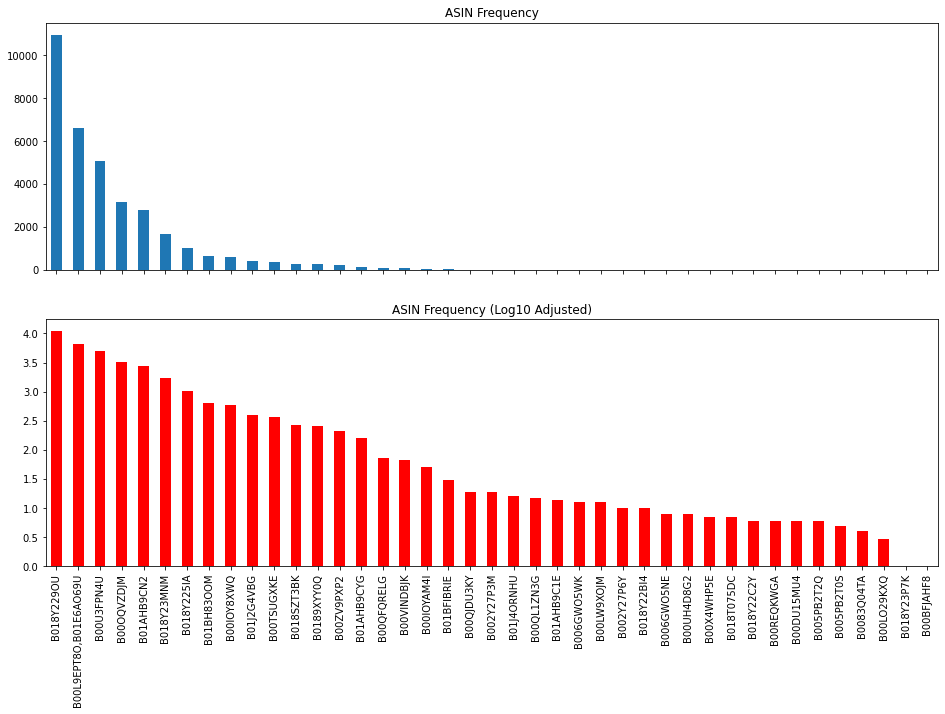

In [ ]:
#Based on number of reviews on each product

fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
senti["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency")
np.log10(senti["asins"].value_counts()).plot(kind="bar", ax=ax2, title="ASIN Frequency (Log10 Adjusted)", color=["red"])
plt.show()

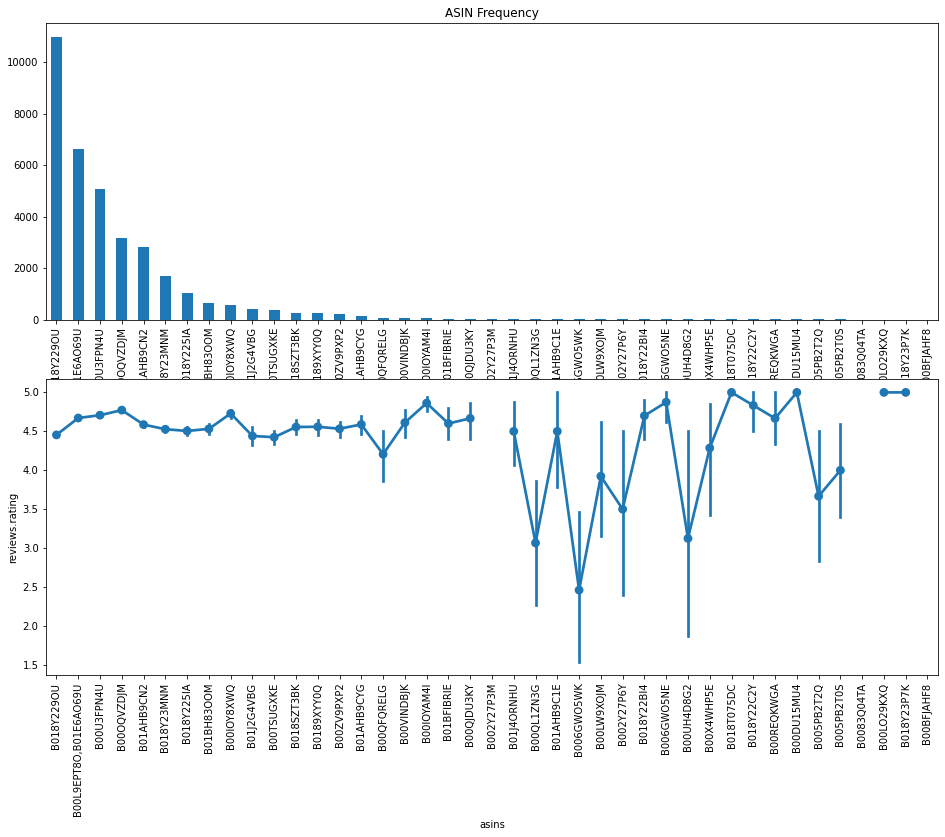

In [ ]:
#Based on review ratings of the products
asins_count_ix = senti["asins"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
senti["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.rating", order=asins_count_ix, data=senti)
plt.xticks(rotation=90)
plt.show()

In [ ]:
senti_data["reviews.rating"].mean()

4.584500736547183

In [ ]:
corr_matrix = senti.corr()
corr_matrix

,reviews.numHelpful,reviews.rating
reviews.numHelpful,1.000000,-0.042395
reviews.rating,-0.042395,1.000000


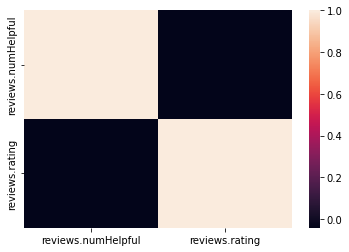

In [ ]:
sns.heatmap(senti.corr())

In [ ]:
counts = senti["asins"].value_counts().to_frame()
counts.head()

,asins
B018Y229OU,10966
"B00L9EPT8O,B01E6AO69U",6619
B00U3FPN4U,5056
B00OQVZDJM,3176
B01AHB9CN2,2814


In [ ]:
avg_rating = senti.groupby("asins")["reviews.rating"].mean().to_frame()
avg_rating.head()

,reviews.rating
asins,
B002Y27P3M,NaN
B002Y27P6Y,3.500000
B005PB2T0S,4.000000
B005PB2T2Q,3.666667
B006GWO5NE,4.875000


In [ ]:
table = counts.join(avg_rating)
table.head(30)

,asins,reviews.rating
B018Y229OU,10966,4.454222
"B00L9EPT8O,B01E6AO69U",6619,4.671098
B00U3FPN4U,5056,4.707278
B00OQVZDJM,3176,4.772355
B01AHB9CN2,2814,4.586709
B018Y23MNM,1685,4.527003
B018Y225IA,1038,4.504817
B01BH83OOM,636,4.531447
B00IOY8XWQ,580,4.729310
B01J2G4VBG,402,4.440299


,asins,reviews.rating
asins,1.000000,0.128888
reviews.rating,0.128888,1.000000


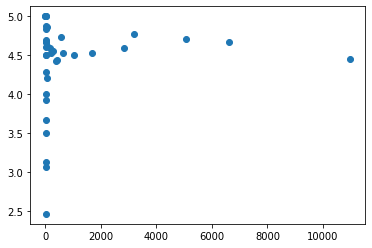

In [ ]:
plt.scatter("asins", "reviews.rating", data=table)
table.corr()

0     Positive
1     Positive
2     Positive
3     Positive
4     Positive
5     Positive
6     Positive
7     Positive
8     Positive
9     Positive
10    Positive
11    Positive
12    Positive
13    Positive
14    Positive
15    Positive
16    Positive
17    Positive
18    Positive
19    Positive
Name: sentiment_label, dtype: object

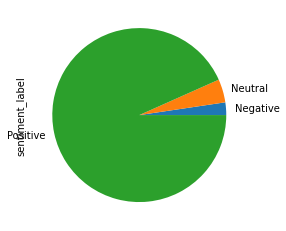

In [ ]:
def sentiment_labeler(scores):
  if scores==5 or scores==4:
    return "Positive"
  elif scores==3:
    return "Neutral"
  else:
    return "Negative"
senti_data["sentiment_label"]=senti_data["reviews.rating"].apply(sentiment_labeler)
senti_data["sentiment_label"].value_counts().sort_values().plot.pie()

senti_data["sentiment_label"][:20]

In [ ]:
#Split into Train/Test
from sklearn.model_selection import StratifiedShuffleSplit
split_data = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split_data.split(senti_data,senti_data["reviews.rating"]):
    train_data = senti_data.reindex(train_index)
    test_data = senti_data.reindex(test_index)
print(train_data.shape)

print(test_data.shape)
train_data

(27696, 4)
(6925, 4)


,reviews.rating,reviews.text,reviews.title,sentiment_label
31495,3.0,It's so hard to decide If i should recommend t...,Good and Bad,Neutral
33293,5.0,"This unit has a powerful processor, load conte...",High performance unit,Positive
23233,5.0,Absolutely adore my Echo. I am always skeptica...,Love Alexa!,Positive
11994,4.0,Bought for my kids. They each have one and lov...,Great tablet for the price,Positive
13565,5.0,I picked up this tablet primarily so my husban...,Easy Tablet Easy Price,Positive
...,...,...,...,...
2029,4.0,It's easy and intuitive. The only criticism is...,Easy and intuitive,Positive
25325,5.0,excedes my expections is easy to use and Amazo...,Echo is enjoyable,Positive
9253,4.0,I do not know much about this tablet and have ...,Great little tablet for a 1st time user,Positive
26893,3.0,The best thing about the echo is the sound qua...,Needs work,Neutral


In [ ]:

#sanity check
train_data_stats=train_data["reviews.rating"].value_counts()/len(train_data)
print("Sanity Check diff scale rating:",train_data_stats)
print("======================")
test_data_stats=test_data["reviews.rating"].value_counts()/len(test_data)
print("Sanity Check diff scale rating in training data:",test_data_stats)


Sanity Check diff scale rating: 5.0    0.685947
4.0    0.246462
3.0    0.043905
2.0    0.011735
1.0    0.010940
Name: reviews.rating, dtype: float64
Sanity Check diff scale rating in training data: 5.0    0.685921
4.0    0.246931
3.0    0.040578
1.0    0.014007
2.0    0.010975
Name: reviews.rating, dtype: float64


In [ ]:
# Prepare data
X_train = train_data["reviews.text"]
y_train= train_data["sentiment_label"]
X_test = test_data["reviews.text"]
y_test = test_data["sentiment_label"]
print("dimention of training data",X_train.shape)
print("dimention of testing data",X_test.shape)


dimention of training data (27696,)
dimention of testing data (6925,)


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

# Replace "nan" with space
X_train = X_train.fillna(' ')
X_test = X_test.fillna(' ')
y_train = y_train.fillna(' ')
y_test= y_test.fillna(' ')
# Text preprocessing and occurance counting

X_train_counts = CountVectorizer().fit_transform(X_train)
print("Dimention of bag of words", X_train_counts.shape)
tfidf = TfidfTransformer(use_idf=False)
X_train_tfidf=tfidf.fit_transform(X_train_counts)
print("tfidf for X_train", X_train_tfidf)




Dimention of bag of words (27696, 12568)
tfidf for X_train   (0, 217)	0.06950480468569159
  (0, 442)	0.06950480468569159
  (0, 830)	0.06950480468569159
  (0, 836)	0.13900960937138318
  (0, 889)	0.06950480468569159
  (0, 944)	0.20851441405707474
  (0, 1382)	0.06950480468569159
  (0, 1495)	0.06950480468569159
  (0, 1902)	0.06950480468569159
  (0, 1972)	0.06950480468569159
  (0, 2302)	0.06950480468569159
  (0, 2694)	0.06950480468569159
  (0, 3051)	0.06950480468569159
  (0, 3235)	0.06950480468569159
  (0, 3487)	0.06950480468569159
  (0, 3576)	0.06950480468569159
  (0, 3692)	0.06950480468569159
  (0, 3810)	0.06950480468569159
  (0, 4275)	0.06950480468569159
  (0, 4468)	0.06950480468569159
  (0, 4998)	0.06950480468569159
  (0, 5249)	0.13900960937138318
  (0, 5284)	0.20851441405707474
  (0, 5549)	0.06950480468569159
  (0, 5640)	0.06950480468569159
  :	:
  (27694, 11363)	0.2279211529192759
  (27694, 11842)	0.11396057645963795
  (27694, 11850)	0.11396057645963795
  (27694, 12293)	0.113960576459

#Applying Models

In [ ]:
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
accuracies = {}

#Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()),("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train, y_train)
predicted_nb=clf_multiNB_pipe.predict(X_test)

print(classification_report(y_test, predicted_nb))
accu=accuracy_score(y_test,predicted_nb)
print('Accuracy: {}'. format(accu))
accuracies['Naive Bayes'] = accu


              precision    recall  f1-score   support

                   0.00      0.00      0.00        11
    Negative       0.00      0.00      0.00       173
     Neutral       0.00      0.00      0.00       281
    Positive       0.93      1.00      0.97      6460

    accuracy                           0.93      6925
   macro avg       0.23      0.25      0.24      6925
weighted avg       0.87      0.93      0.90      6925

Accuracy: 0.9325631768953069


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Logistic regression


In [ ]:

from sklearn.linear_model import LogisticRegression

clf_logReg_pipe = Pipeline([("vect", CountVectorizer()),("tfidf", TfidfTransformer()),("clf_logReg", LogisticRegression())])
clf_logReg_pipe.fit(X_train, y_train)
predictedLogReg = clf_logReg_pipe.predict(X_test)

print(classification_report(y_test, predictedLogReg))
# print('Accuracy: {}'. format(accuracy_score(y_test,predictedLogReg )))
accu2=accuracy_score(y_test,predictedLogReg)
print('Accuracy: {}'. format(accu2))
accuracies['logistic regression'] = accu2

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

                   0.00      0.00      0.00        11
    Negative       0.78      0.18      0.29       173
     Neutral       0.45      0.09      0.15       281
    Positive       0.94      1.00      0.97      6460

    accuracy                           0.94      6925
   macro avg       0.54      0.32      0.35      6925
weighted avg       0.92      0.94      0.92      6925

Accuracy: 0.9373285198555956


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#LinearSVC

In [ ]:
#linearSVC
from sklearn.svm import LinearSVC
from sklearn import linear_model

clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()),("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(X_train, y_train)
predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
print(classification_report(y_test, predictedLinearSVC))
# print('Accuracy: {}'. format(accuracy_score(y_test,predictedLinearSVC)))
accu3=accuracy_score(y_test,predictedLinearSVC)
print('Accuracy: {}'. format(accu3))
accuracies['linearSVC'] = accu3

              precision    recall  f1-score   support

                   0.00      0.00      0.00        11
    Negative       0.61      0.28      0.39       173
     Neutral       0.43      0.12      0.19       281
    Positive       0.95      0.99      0.97      6460

    accuracy                           0.94      6925
   macro avg       0.50      0.35      0.39      6925
weighted avg       0.92      0.94      0.92      6925

Accuracy: 0.9387725631768953


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Decision Tree Classifier


In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf_decisionTree_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_decisionTree", DecisionTreeClassifier())])
clf_decisionTree_pipe.fit(X_train, y_train)
predictedDecisionTree = clf_decisionTree_pipe.predict(X_test)

print(classification_report(y_test, predictedDecisionTree))
# print('Accuracy: {}'. format(accuracy_score(y_test,predictedDecisionTree)))

accu4=accuracy_score(y_test,predictedDecisionTree)
print('Accuracy: {}'. format(accu4))
accuracies['Decision Tree Classifier'] = accu4

              precision    recall  f1-score   support

                   0.58      1.00      0.73        11
    Negative       0.23      0.18      0.20       173
     Neutral       0.13      0.14      0.13       281
    Positive       0.95      0.95      0.95      6460

    accuracy                           0.90      6925
   macro avg       0.47      0.57      0.50      6925
weighted avg       0.90      0.90      0.90      6925

Accuracy: 0.896173285198556


#Random Forest Classifier


In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf_randomForest_pipe = Pipeline([("vect", CountVectorizer()),("tfidf", TfidfTransformer()), ("clf_randomForest", RandomForestClassifier())])

clf_randomForest_pipe.fit(X_train, y_train)
print(clf_randomForest_pipe)
predictedRandomForest = clf_randomForest_pipe.predict(X_test)
print(classification_report(y_test, predictedRandomForest))
# print('Accuracy: {}'. format(accuracy_score(y_test,predictedRandomForest)))
accu5=accuracy_score(y_test,predictedRandomForest)
print('Accuracy: {}'. format(accu5))
accuracies['Random Forest Classifier'] = accu5

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_randomForest', RandomForestClassifier())])
              precision    recall  f1-score   support

                   0.69      1.00      0.81        11
    Negative       1.00      0.01      0.02       173
     Neutral       1.00      0.01      0.01       281
    Positive       0.93      1.00      0.97      6460

    accuracy                           0.93      6925
   macro avg       0.91      0.50      0.45      6925
weighted avg       0.94      0.93      0.90      6925

Accuracy: 0.9342960288808664


In [ ]:
#reverse
accu_sorted = sorted(accuracies.items(), key=lambda x:x[-1],reverse=True)
converted_dict = dict(accu_sorted)
print(converted_dict)

{'linearSVC': 0.9387725631768953, 'logistic regression': 0.9373285198555956, 'Random Forest Classifier': 0.9342960288808664, 'Naive Bayes': 0.9325631768953069, 'Decision Tree Classifier': 0.896173285198556}


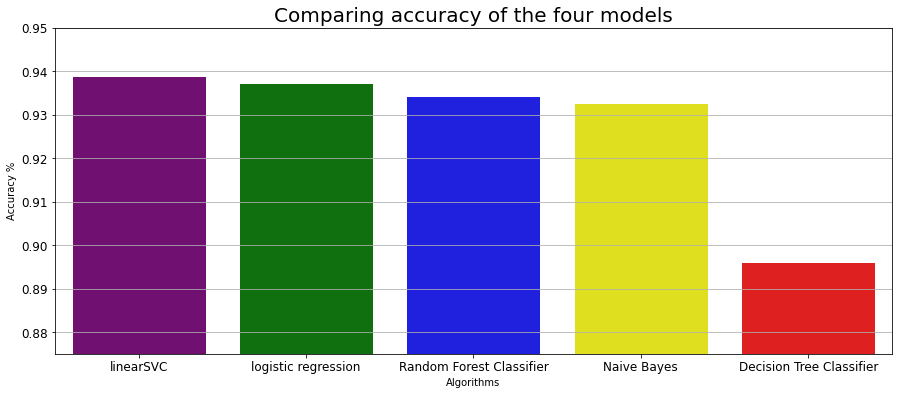

In [ ]:
colors = ["purple", "green", "blue","yellow", "red"]
plt.figure(figsize = (15,6))
plt.grid(True)
sns.set_style("whitegrid")

bar_chartrange=sns.barplot(x=list(converted_dict.keys()), y=list(converted_dict.values()), palette=colors)
bar_chartrange.set_ylim(bottom=0.875, top=0.950)


plt.title('Comparing accuracy of the four models', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")


plt.show()

In [ ]:
df_accuracy = pd.DataFrame(accuracies.items(), columns=['Model', 'Accuracy'])
df_accuracy.sort_values(by= ['Accuracy'], inplace= True, ascending= False)
df_accuracy

,Model,Accuracy
2,linearSVC,0.938773
1,logistic regression,0.937329
4,Random Forest Classifier,0.934296
0,Naive Bayes,0.932563
3,Decision Tree Classifier,0.896173
